In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# LOAD DATA

In [2]:
train = pd.read_csv('Train.csv')
test =pd.read_csv('Test.csv')
sample_sub = pd.read_csv('SampleSubmission.csv')

train.shape, test.shape, sample_sub.shape

((7205, 9), (2061, 8), (2061, 2))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-null   object 
 2   Maker      2061 non-null   object 
 3   Model      2061 non-null   object 
 4   Year       2059 non-null   object 
 5   Colour     2061 non-null   object 
 6   Type       2007 non-null   object 
 7   Distance   1385 non-null   float64
dtypes: float64(1), object(7)
memory usage: 128.9+ KB


<AxesSubplot:>

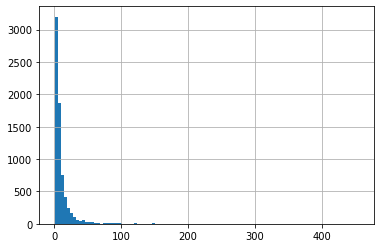

In [5]:
train['Amount (Million Naira)'].hist(bins = 100)

It looks like the target column also has some missing values, but since it's the target we can't just use any special method of replacing missing values due to the risk of adding noise to our data. So instead, we have to remove it

In [6]:
train.isna().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

<AxesSubplot:xlabel='Amount (Million Naira)'>

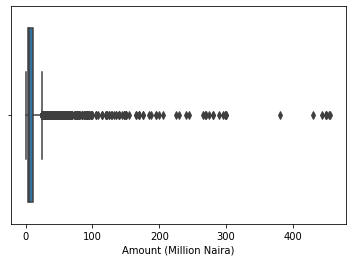

In [7]:
sns.boxplot(x = 'Amount (Million Naira)', data=train)

array([[<AxesSubplot:xlabel='Amount (Million Naira)', ylabel='Amount (Million Naira)'>]],
      dtype=object)

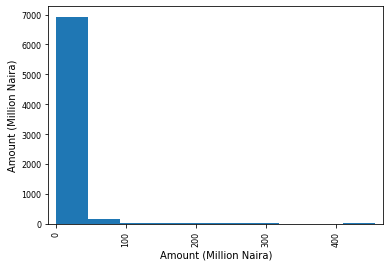

In [8]:
pd.plotting.scatter_matrix(train)

In [9]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [10]:
train.dropna(subset = ['Amount (Million Naira)'],inplace=True)

In [11]:
train.isna().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
dtype: int64

In [12]:
train.shape

(7188, 9)

In [13]:
test.shape

(2061, 8)

In [14]:
y = train.pop('Amount (Million Naira)')

In [15]:
all = pd.concat([train,test],ignore_index=True)

In [16]:
all.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,Nigerian Used,"125,206"


In [17]:
all.isna().sum()

VehicleID       0
Location        0
Maker           0
Model           0
Year           23
Colour          0
Type          250
Distance     3028
dtype: int64

In [18]:
all.drop(columns = ['Distance'],inplace=True)

In [19]:
all.Type.nunique()

3

In [20]:
all.Type.value_counts()

Foreign Used     6276
Nigerian Used    2436
Brand New         287
Name: Type, dtype: int64

In [21]:
all.Type.fillna('Foreign Used', inplace=True)

In [22]:
all.Year.nunique()

35

In [23]:
all.Year = all.Year.str.replace(',','')
all.Year = all.Year.astype(float)

In [24]:
all.Year.median()

2011.0

In [25]:
all.Year.fillna(all.Year.median(), inplace=True)

<AxesSubplot:>

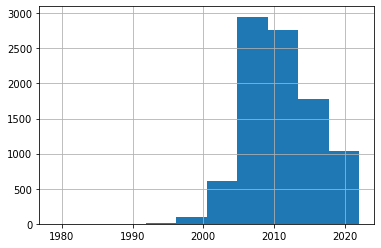

In [26]:
all.Year.hist()

In [27]:
all.Year = all.Year.astype(int)

In [28]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

all.Location.nunique()

3

In [29]:
all.Maker.nunique()

56

In [30]:
all.Model.nunique()

1410

In [31]:
all.Colour.nunique()

24

In [32]:
all = pd.get_dummies(all,prefix='',prefix_sep='',columns=['Location','Type'])

In [33]:
all.head()

,VehicleID,Maker,Model,Year,Colour,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used
0,VHL12546,Honda,Accord Coupe EX V-6,2011,Silver,1,0,0,0,0,1
1,VHL18827,Hyundai,Sonata,2012,Silver,0,1,0,0,0,1
2,VHL19499,Lexus,RX 350,2010,Red,0,0,1,0,1,0
3,VHL17991,Mercedes-Benz,GLE-Class,2017,Blue,1,0,0,0,1,0
4,VHL12170,Toyota,Highlander,2002,Red,0,1,0,0,0,1


In [34]:
cat_cols = ['Maker', 'Model', 'Colour']
for col in cat_cols:
    all[col] = all[col].astype('category')
    all[col] = all[col].cat.codes

In [35]:
all.drop(columns=['VehicleID',"Model"],inplace=True)

In [36]:
train,test = all.iloc[:7188], all.iloc[7188:]

> Putting the Data back into training and test sets after all the cleaning

In [37]:
train['Amount'] = y

In [38]:
train.head()

,Maker,Year,Colour,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,Amount
0,17,2011,18,1,0,0,0,0,1,2.2
1,19,2012,18,0,1,0,0,0,1,3.5
2,29,2010,17,0,0,1,0,1,0,9.2
3,34,2017,3,1,0,0,0,1,0,22.8
4,53,2002,17,0,1,0,0,0,1,2.6


In [39]:
test.head()

,Maker,Year,Colour,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used
7188,3,2008,22,1,0,0,0,1,0
7189,53,2013,22,0,0,1,0,1,0
7190,53,2005,8,0,0,1,0,1,0
7191,53,2011,9,0,0,1,0,1,0
7192,29,2013,17,0,0,1,0,1,0


In [40]:
# train.to_csv('cleaned_train_with_dummy.csv',index=False)
# test.to_csv('cleaned_test_with_dummy.csv', index=False)

In [41]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [42]:
data_correlation = train.corr()

In [43]:
data_correlation['Amount']

Maker           -0.006989
Year             0.007635
Colour           0.008405
Abuja           -0.004293
Ibadan           0.016719
Lagos           -0.005161
Brand New        0.008256
Foreign Used     0.001998
Nigerian Used   -0.005279
Amount           1.000000
Name: Amount, dtype: float64

**LADIES AND GENTLEMEN, I HAVE BAD NEWS . WE DON'T HAVE ANY FEATURE THAT'S CLOSELY CORRELATED WITH THE AMOUNT TARGET**

In [44]:
train.dropna(subset=['Amount'],inplace=True)

In [45]:
from sklearn.preprocessing import StandardScaler
# sc_target = StandardScaler()
# train['Amount'] = sc_target.fit_transform(train.Amount.values.reshape(-1,1))

X = train.drop('Amount',axis  = 1)
y = train['Amount']

X_train,X_valid, y_train,y_valid = train_test_split(X,y,random_state=0)

In [46]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
lin_preds = linreg.predict(X_valid)

mse = lambda x: metrics.mean_squared_error(y_valid,x,squared=False)
print("the mean squared error using linear regression is:", mse(lin_preds))

the mean squared error using linear regression is: 22.664930143386243


In [47]:
ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)
ridge_preds = ridge.predict(X_valid)

mse(ridge_preds)

22.657648177882027

In [48]:
rf = RandomForestRegressor(max_depth=3,random_state=0)
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_valid)
mse(rf_preds)

22.674537837018846

In [49]:
gb = GradientBoostingRegressor(learning_rate=.0001,max_depth=3,random_state=0,max_leaf_nodes=3)
gb.fit(X_train,y_train)
gb_preds = gb.predict(X_valid)
mse(gb_preds)

22.628510679117007

In [50]:
svr = SVR()
svr.fit(X_train,y_train)
svr_preds = svr.predict(X_valid)
mse(svr_preds)

23.39591373721375

In [51]:
def save(model,file_name):
    X_test = test
    sub_file  = sample_sub.copy()
    test_set_predictions = model.predict(X_test)
    sub_file['Amount (Million Naira)'] = test_set_predictions
    print(test_set_predictions[:10])
    print('submission file created')
    sub_file.to_csv(file_name, index=False)

In [52]:
print(sample_sub.columns.values)

['VehicleID' 'Amount (Million Naira)']


In [56]:
sgd = SGDRegressor()
sgd.fit(X_train,y_train)
sgd_preds = sgd.predict(X_valid)
mse(sgd_preds)

594234079688335.1

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train)